In [1]:
import requests
from tqdm import tqdm
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# параметры запроса
# Сбербанк
sber = '3529' 
# страница
page = 1 
# кол-во записей на странице
num_per_page = 100
# Москва
area_id = 1
# ссылка
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={area_id}'

In [3]:
# извлекаем данные по ссылке
res = requests.get(url)

In [4]:
# из джcона в словать данные о запросе
vacancies = res.json()

In [5]:
# ключи словаря
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [6]:
# извлекаем информацию о кол-ве страниц
num_pages = vacancies.get('pages')
# извлекаем id вакансий из описания items
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [7]:
# извлекаем все id вакансий из описания items со всех страниц
all_vacancy_ids = []
for i in tqdm(range(vacancies.get('pages'))): # range - диапазон объекта
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={area_id}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids) # exten - добавляет в список элементы итерации

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.25it/s]


In [8]:
# количество всех id вакансий
len(all_vacancy_ids)

2000

In [11]:
# пример
vac_id = 43326020
url = f'https://api.hh.ru/vacancies/{vac_id}'
res = requests.get(url)
vacancy = res.json()
vacancy

{'id': '43326020',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Специалист по экономической безопасности',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'site': {'id': 'hh', 'name': 'hh.ru'},
 'experience': {'id': 'between1And3', 'name': 'От 1 года до 3 лет'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'},
 'contacts': None,
 'description': '<p><strong>Обязанности:</strong></p> <p> </p> <ul> <li>Поиск и анализ информации в отношении клиентов/контрагентов Банка для оценки уровня кредитных рисков, рисков деловой репутации, иных рисков сотрудничества с контрагентами, в т.ч. в рамках закупочных проце

In [ ]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [12]:
# нормализация данных
pd.json_normalize(vacancy)

,id,premium,relations,name,insider_interview,response_letter_required,salary,address,allow_messages,contacts,...,department.name,employer.id,employer.name,employer.url,employer.alternate_url,employer.logo_urls.original,employer.logo_urls.90,employer.logo_urls.240,employer.vacancies_url,employer.trusted
0,43326020,False,[],Специалист по экономической безопасности,None,False,None,None,True,None,...,Сбер для экспертов,3529,Сбербанк,https://api.hh.ru/employers/3529,https://hh.ru/employer/3529,https://hhcdn.ru/employer-logo-original/868362...,https://hhcdn.ru/employer-logo/3914323.jpeg,https://hhcdn.ru/employer-logo/3914324.jpeg,https://api.hh.ru/vacancies?employer_id=3529,True


In [13]:
# создаем DataFrame подставляя в url id вакансий из all_vacancy_ids и записывая данные в vac
df=pd.DataFrame()
url = 'https://api.hh.ru/vacancies/{}'
vac = []
for i in tqdm(all_vacancy_ids):
    df=df.append(pd.json_normalize(requests.get(url.format(i)).json()))

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [10:40<00:00,  3.12it/s]


In [22]:
df.head()

,id,premium,relations,name,insider_interview,response_letter_required,address,allow_messages,contacts,description,...,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.metro,immediate_redirect_url
0,44281010,False,[],Клиентский менеджер,None,False,None,True,None,"<p>Клиентский менеджер ― специалист, который п...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,46943947,False,[],Клиентский менеджер прямых продаж,None,False,None,True,None,<p>У каждого нашего зарплатного клиента – комп...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,46380141,False,[],Клиентский менеджер внешней дистрибуции (Прямы...,None,False,None,True,None,"<p>Хочешь работать в банке, но офисная рутина ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,44951547,False,[],Клиентский менеджер,None,False,None,True,None,"<p>Клиентский менеджер ― специалист, который п...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,48119790,False,[],Менеджер по подбору новостроек от Домклик,None,False,None,True,None,"<p>Мы ищем коллегу, который будет помогать наш...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.to_excel("all_vacancy.xlsx")

In [34]:
# только указанные колонки
vac_sber = df[['id', 'premium', 'name', 'allow_messages', 'description', 'key_skills', 'specializations', 'published_at', 'created_at', 'billing_type.name', 'salary.from', 'salary.to', 'type.name', 'experience.name', 'schedule.name', 'employment.name', 'department.name']].copy()

In [35]:
vac_sber.head()

,id,premium,name,allow_messages,description,key_skills,specializations,published_at,created_at,billing_type.name,salary.from,salary.to,type.name,experience.name,schedule.name,employment.name,department.name
0,44281010,False,Клиентский менеджер,True,"<p>Клиентский менеджер ― специалист, который п...","[{'name': 'Активные продажи'}, {'name': 'Консу...","[{'id': '5.219', 'name': 'Привлечение клиентов...",2021-10-06T14:27:44+0300,2021-10-06T14:27:44+0300,Стандарт,77000,None,Открытая,Нет опыта,Полный день,Полная занятость,Сбер. Начало карьеры
0,46943947,False,Клиентский менеджер прямых продаж,True,<p>У каждого нашего зарплатного клиента – комп...,[],"[{'id': '5.219', 'name': 'Привлечение клиентов...",2021-10-11T11:10:21+0300,2021-10-11T11:10:21+0300,Стандарт,95000,None,Открытая,Нет опыта,Полный день,Полная занятость,Сбер. Начало карьеры
0,46380141,False,Клиентский менеджер внешней дистрибуции (Прямы...,True,"<p>Хочешь работать в банке, но офисная рутина ...","[{'name': 'Активные продажи'}, {'name': 'Работ...","[{'id': '5.126', 'name': 'Кредиты', 'profarea_...",2021-10-14T14:48:43+0300,2021-10-14T14:48:43+0300,Стандарт,95000,None,Открытая,Нет опыта,Гибкий график,Полная занятость,Сбер. Начало карьеры
0,44951547,False,Клиентский менеджер,True,"<p>Клиентский менеджер ― специалист, который п...","[{'name': 'Активные продажи'}, {'name': 'Прямы...","[{'id': '5.735', 'name': 'Другое', 'profarea_i...",2021-10-06T20:09:35+0300,2021-10-06T20:09:35+0300,Стандарт,77000,None,Открытая,Нет опыта,Полный день,Полная занятость,Сбер. Начало карьеры
0,48119790,False,Менеджер по подбору новостроек от Домклик,True,"<p>Мы ищем коллегу, который будет помогать наш...",[],"[{'id': '5.219', 'name': 'Привлечение клиентов...",2021-10-21T10:21:45+0300,2021-10-21T10:21:45+0300,Стандарт,90000,None,Открытая,От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов


In [36]:
# skills
df['key_skills']

0    [{'name': 'Активные продажи'}, {'name': 'Консу...
0                                                   []
0    [{'name': 'Активные продажи'}, {'name': 'Работ...
0    [{'name': 'Активные продажи'}, {'name': 'Прямы...
0                                                   []
                           ...                        
0                                                   []
0    [{'name': 'Работа в команде'}, {'name': 'Риск-...
0    [{'name': 'Python'}, {'name': 'Linux'}, {'name...
0                                                   []
0    [{'name': 'Прямые продажи'}, {'name': 'Активны...
Name: key_skills, Length: 2000, dtype: object

In [38]:
# перевод даты публикации в datetime
vac_sber['published_at'] = pd.to_datetime(vac_sber['published_at'])
vac_sber['published_at'] = vac_sber['published_at'].dt.strftime('%Y.%m.%d')
vac_sber['created_at'] = pd.to_datetime(vac_sber['created_at'])
vac_sber['created_at'] = vac_sber['created_at'].dt.strftime('%Y.%m.%d')

In [39]:
vacs = vac_sber[['name','published_at']]

In [40]:
vacs

,name,published_at
0,Клиентский менеджер,2021.10.06
0,Клиентский менеджер прямых продаж,2021.10.11
0,Клиентский менеджер внешней дистрибуции (Прямы...,2021.10.14
0,Клиентский менеджер,2021.10.06
0,Менеджер по подбору новостроек от Домклик,2021.10.21
...,...,...
0,Senior Data Scientist (моделист) центра внутри...,2021.10.22
0,Руководитель направления по развитию ПВР (оцен...,2021.10.20
0,Инженер OpenStack,2021.10.18
0,QA Инженер тестирования,2021.10.15


In [41]:
# группируем по датам публикаций вакансий с выводом кол-ва и переводим наименование вакансии в индекс
bb = vacs.groupby('published_at')['name'].count().reset_index()
# сотритуем по убыванию
bb = bb.sort_values(by = 'name',ascending = False)

<AxesSubplot:ylabel='published_at'>

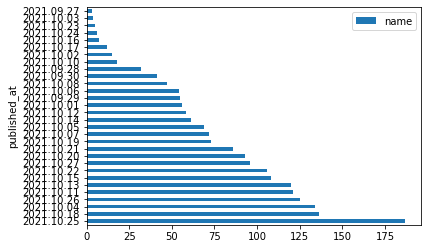

In [42]:
# график публикаций по всем датам
bb.set_index('published_at').plot(kind='barh')

<AxesSubplot:ylabel='published_at'>

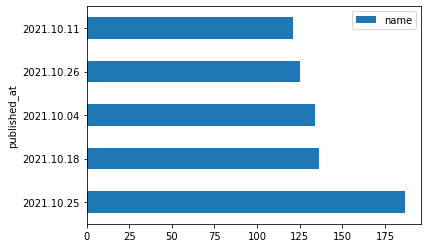

In [43]:
# график ТОП 5 дат
bb.nlargest(5, 'name').set_index('published_at').plot(kind='barh')

In [44]:
# создаем новый столбец days_week с днем недели, в который сделана публикация
vac_sber['published_at'] = pd.to_datetime(vac_sber['published_at'])
vac_sber['days_week'] = vac_sber['published_at'].dt.strftime('%A')

In [45]:
# группируем по дням недели с выводом кол-ва, сортируем по убыванию
vac_sber.groupby('days_week')['name'].count().reset_index().sort_values(by = 'name',ascending = False)

,days_week,name
1,Monday,581
6,Wednesday,418
5,Tuesday,357
0,Friday,317
4,Thursday,260
3,Sunday,40
2,Saturday,27


In [46]:
# интересные вакансии со skills - python
interes = vac_sber.set_index('id')
interes = interes[interes['key_skills'].isna()==False] # берем не пустные ячейки key_skills

In [47]:
vac_python = pd.DataFrame()
for i in interes.iloc():
    for j in i['key_skills']:
        if 'python' in j['name'].lower():
            vac_python = vac_python.append(i)

In [56]:
# кол-во интересующих вакансий с python
len(vac_python)

229

In [57]:
# извлекает требуемые навыки по интересующим вакансиям с python
skills = []
for i in vac_python.iloc():
    for j in i['key_skills']:
        skills.append(j['name'])

In [58]:
# создаем новые колонки
df_skills = pd.DataFrame()
df_skills['skill'] = skills
df_skills['сol'] = ""

In [59]:
df_skills = df_skills.groupby('skill')['сol'].count().reset_index().sort_values(by = 'сol',ascending = False)

In [60]:
df_skills

,skill,сol
128,Python,229
146,SQL,126
92,Linux,70
55,Git,61
118,PostgreSQL,46
...,...,...
122,Product Management,1
123,Prometheus,1
124,Puppet,1
125,PyTest,1


<AxesSubplot:ylabel='skill'>

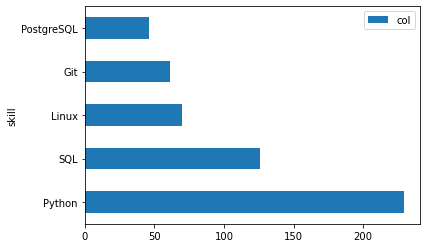

In [61]:
# график ТОП 5 навыков в интересующих вакансиях с python
df_skills.nlargest(5, 'сol').set_index('skill').plot(kind = 'barh')